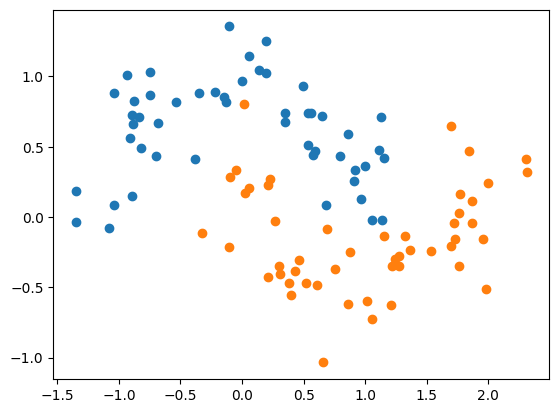

In [2]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 53ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3008 - val_accuracy: 0.9286
Epoch 1502/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.9286
Epoch 1503/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3011 - val_accuracy: 0.9286
Epoch 1504/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3012 - val_accuracy: 0.9286
Epoch 1505/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3013 - val_accuracy: 0.9286
Epoch 1506/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3015 - val_accuracy: 0.9286
Epoch 1507/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.0049 - accuracy: 1.0000

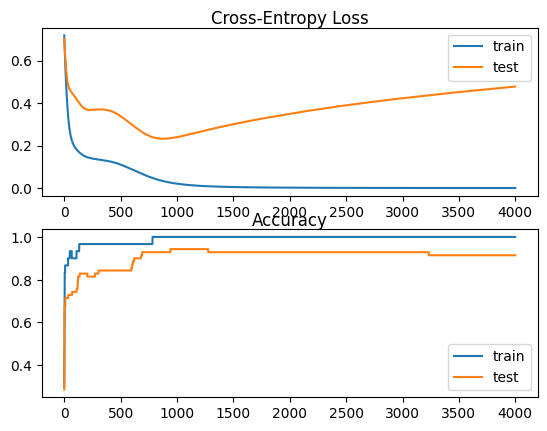

In [4]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

***Weight regularization***

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 64ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 0.9429
Epoch 1502/4000
1/1 [==============================] - 0s 86ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.2475 - val_accuracy: 0.9429
Epoch 1503/4000
1/1 [==============================] - 0s 80ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.2476 - val_accuracy: 0.9429
Epoch 1504/4000
1/1 [==============================] - 0s 82ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.2477 - val_accuracy: 0.9429
Epoch 1505/4000
1/1 [==============================] - 0s 83ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.2477 - val_accuracy: 0.9429
Epoch 1506/4000
1/1 [==============================] - 0s 98ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.2477 - val_accuracy: 0.9429
Epoch 1507/4000
1/1 [==============================] - 0s 86ms/step - loss: 0.0364 - accuracy: 1.0000

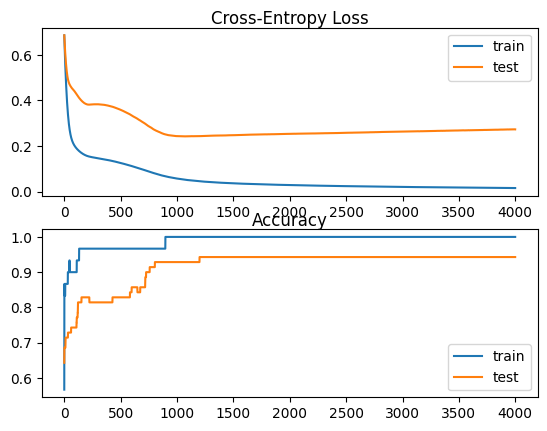

In [5]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()